# The CO2 Emission of Vehicles

In this project I would like to study the CO2 emission of vehicles in US. I use the information of vehicles to build model by the linear regression.

### Import Libary

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
sns.set(context='paper',style='whitegrid',font_scale=2, rc={"lines.linewidth": 2.5})
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

I find the vehicle testing data in website (https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy). Because the model year of my car is 2011, so I focus on the 2011 vehicle testing data.

In [2]:
df = pd.read_csv("usa2011.csv")
df.head()

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,...,Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2011,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.9,9ASXV05.9VH1,Car,...,19.11,0.4320,0.0147,NaN,NaN,N,NaN,NaN,N,No averaging
1,2011,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.9,9ASXV05.9VH1,Car,...,19.11,0.4320,0.0147,NaN,NaN,N,NaN,NaN,N,No averaging
2,2011,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.9,AASXV05.9VH1,Car,...,2.23,0.6948,0.0130,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
3,2011,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.9,AASXV05.9VH1,Car,...,2.23,0.6948,0.0130,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4,2011,aston martin,ASX,Aston Martin,DBS,304M2323,0,5.9,9ASXV05.9VH1,Car,...,17.40,0.2270,0.0209,NaN,NaN,N,NaN,NaN,N,No averaging


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 64 columns):
Model Year                        3762 non-null int64
Vehicle Manufacturer Name         3762 non-null object
Veh Mfr Code                      3762 non-null object
Represented Test Veh Make         3762 non-null object
Represented Test Veh Model        3762 non-null object
Test Vehicle ID                   3762 non-null object
Test Veh Configuration #          3762 non-null int64
Test Veh Displacement (L)         3762 non-null float64
Actual Tested Testgroup           3762 non-null object
Vehicle Type                      3762 non-null object
Rated Horsepower                  3762 non-null int64
# of Cylinders and Rotors         3270 non-null float64
Engine Code                       3762 non-null object
Tested Transmission Type Code     3762 non-null object
Tested Transmission Type          3762 non-null object
# of Gears                        3762 non-null int64
Transmission Lo

#### Get Emission type

In [4]:
emission=df[['THC (g/mi)','CO (g/mi)','CO2 (g/mi)','NOx (g/mi)','PM (g/mi)','CH4 (g/mi)','N2O (g/mi)']].mean()
emission

THC (g/mi)      0.029895
CO (g/mi)       0.405050
CO2 (g/mi)    346.343591
NOx (g/mi)      0.013855
PM (g/mi)       0.002557
CH4 (g/mi)      0.007671
N2O (g/mi)      0.009927
dtype: float64

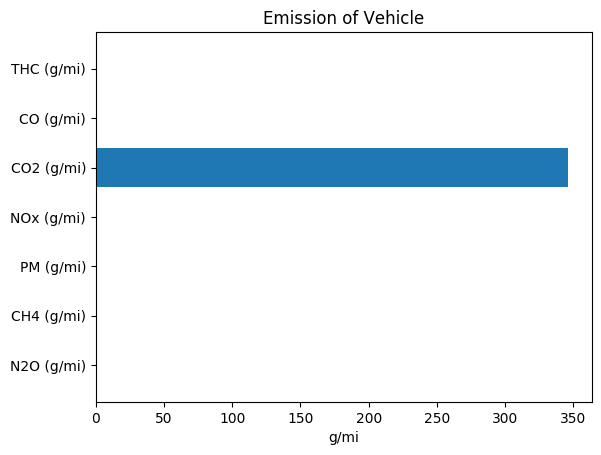

In [5]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(np.arange(len(emission)), emission, align='center')
ax.set_yticks(np.arange(len(emission)))
ax.set_yticklabels(emission.index)
ax.invert_yaxis()
ax.set_xlabel('g/mi')
ax.set_title('Emission of Vehicle')

plt.show()

#### The most emission is CO2. So in the following, I focus on the CO2 emission.

### Use the label encoding for ('Vehicle Type','Tested Transmission Type Code','Transmission Lockup?','Drive System Code','Test Originator','Analytically Derived FE?','Test Category')

In [6]:
le = preprocessing.LabelEncoder()

le.fit(df['Vehicle Type'])
vt=le.transform(df['Vehicle Type'])

le.fit(df['Tested Transmission Type Code'])
tttc=le.transform(df['Tested Transmission Type Code'])

le.fit(df['Transmission Lockup?'])
tl=le.transform(df['Transmission Lockup?'])

le.fit(df['Drive System Code'])
dsc=le.transform(df['Drive System Code'])

le.fit(df['Test Originator'])
to=le.transform(df['Test Originator'])

le.fit(df['Analytically Derived FE?'])
adf=le.transform(df['Analytically Derived FE?'])

le.fit(df['Test Category'])
tc=le.transform(df['Test Category'])

#### prepare data for linear reggression

In [7]:
# df['Test Category'].unique()
cdf1=df[['Test Veh Configuration #','Test Veh Displacement (L)','Rated Horsepower','# of Cylinders and Rotors','# of Gears','Transmission Overdrive Code','Equivalent Test Weight (lbs.)','Axle Ratio','N/V Ratio','Shift Indicator Light Use Cd','Test Procedure Cd','Test Fuel Type Cd','Target Coef A (lbf)','Set Coef A (lbf)','CO2 (g/mi)']]
# 'Vehicle Type','Tested Transmission Type Code','Transmission Lockup?','Drive System Code','Test Originator','Analytically Derived FE?','Test Category'

precdf=pd.DataFrame([vt,tttc,tl,dsc,to,adf,tc])
precdf=precdf.T

cdf=pd.concat([precdf, cdf1], axis=1, sort=False)

In [8]:
cdf.columns=['Vehicle_Type','Tested_Transmission','Transmission_Lockup','Drive_System','Test_Originator','Analytically_Derived_FE','Test_Category','Test_Veh_Conf_Num','Test_Veh_Disp','Rated_Horsepower','Num_of_Cylinders_and_Rotors','Num_of_Gears','Trans_Overdrive','Eq_Test_Weight','Axle_Ratio','N_V_Ratio','Shift_Indicator_Light_Use','Test_Procedure','Test_Fuel_Type','Target_Coef_A','Set_Coef_A','CO2']

In [9]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 22 columns):
Vehicle_Type                   3762 non-null int64
Tested_Transmission            3762 non-null int64
Transmission_Lockup            3762 non-null int64
Drive_System                   3762 non-null int64
Test_Originator                3762 non-null int64
Analytically_Derived_FE        3762 non-null int64
Test_Category                  3762 non-null int64
Test_Veh_Conf_Num              3762 non-null int64
Test_Veh_Disp                  3762 non-null float64
Rated_Horsepower               3762 non-null int64
Num_of_Cylinders_and_Rotors    3270 non-null float64
Num_of_Gears                   3762 non-null int64
Trans_Overdrive                3762 non-null int64
Eq_Test_Weight                 3762 non-null int64
Axle_Ratio                     3762 non-null float64
N_V_Ratio                      3762 non-null float64
Shift_Indicator_Light_Use      3762 non-null int64
Test_Procedure    

#### Drop 'nan' in DataFrame cdf 

In [10]:
cdf.dropna(subset=['CO2'],inplace=True)
cdf.dropna(subset=['Num_of_Cylinders_and_Rotors'],inplace=True)
# cdf['Num_of_Cylinders_and_Rotors'].fillna((cdf['Num_of_Cylinders_and_Rotors'].mean()), inplace=True)

In [11]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3030 entries, 2 to 3761
Data columns (total 22 columns):
Vehicle_Type                   3030 non-null int64
Tested_Transmission            3030 non-null int64
Transmission_Lockup            3030 non-null int64
Drive_System                   3030 non-null int64
Test_Originator                3030 non-null int64
Analytically_Derived_FE        3030 non-null int64
Test_Category                  3030 non-null int64
Test_Veh_Conf_Num              3030 non-null int64
Test_Veh_Disp                  3030 non-null float64
Rated_Horsepower               3030 non-null int64
Num_of_Cylinders_and_Rotors    3030 non-null float64
Num_of_Gears                   3030 non-null int64
Trans_Overdrive                3030 non-null int64
Eq_Test_Weight                 3030 non-null int64
Axle_Ratio                     3030 non-null float64
N_V_Ratio                      3030 non-null float64
Shift_Indicator_Light_Use      3030 non-null int64
Test_Procedure    

In [12]:
cdf.describe()

,Vehicle_Type,Tested_Transmission,Transmission_Lockup,Drive_System,Test_Originator,Analytically_Derived_FE,Test_Category,Test_Veh_Conf_Num,Test_Veh_Disp,Rated_Horsepower,...,Trans_Overdrive,Eq_Test_Weight,Axle_Ratio,N_V_Ratio,Shift_Indicator_Light_Use,Test_Procedure,Test_Fuel_Type,Target_Coef_A,Set_Coef_A,CO2
count,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,...,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000,3030.000000
mean,1.211551,1.775908,0.680858,2.614521,0.912871,0.082838,1.658416,1.896370,3.438307,271.048515,...,1.991419,4313.759076,3.590168,32.052079,1.092079,19.520792,54.587789,37.908354,14.099982,345.305726
std,0.635007,1.978495,0.466221,1.299587,0.282070,0.275683,0.769907,4.048789,1.324870,116.942828,...,0.092250,897.829286,0.666148,5.984343,0.500020,24.196525,13.800232,10.621948,9.043917,121.757633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.999000,70.000000,...,1.000000,2125.000000,1.000000,8.400000,1.000000,2.000000,6.000000,1.843000,-31.798000,121.840334
25%,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2.400000,180.000000,...,2.000000,3625.000000,3.150000,27.600000,1.000000,3.000000,61.000000,30.334000,8.430000,250.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,3.300000,261.000000,...,2.000000,4250.000000,3.460000,31.100000,1.000000,21.000000,61.000000,37.384000,13.794500,326.000000
75%,2.000000,3.000000,1.000000,4.000000,1.000000,0.000000,2.000000,2.000000,4.163000,320.000000,...,2.000000,4750.000000,3.900000,35.000000,1.000000,21.000000,61.000000,43.965000,19.830000,416.122500
max,2.000000,6.000000,1.000000,4.000000,1.000000,1.000000,4.000000,55.000000,7.997000,1200.000000,...,2.000000,7000.000000,6.470000,64.700000,5.000000,95.000000,61.000000,83.000000,96.000000,999.000000


### Visualize the relation

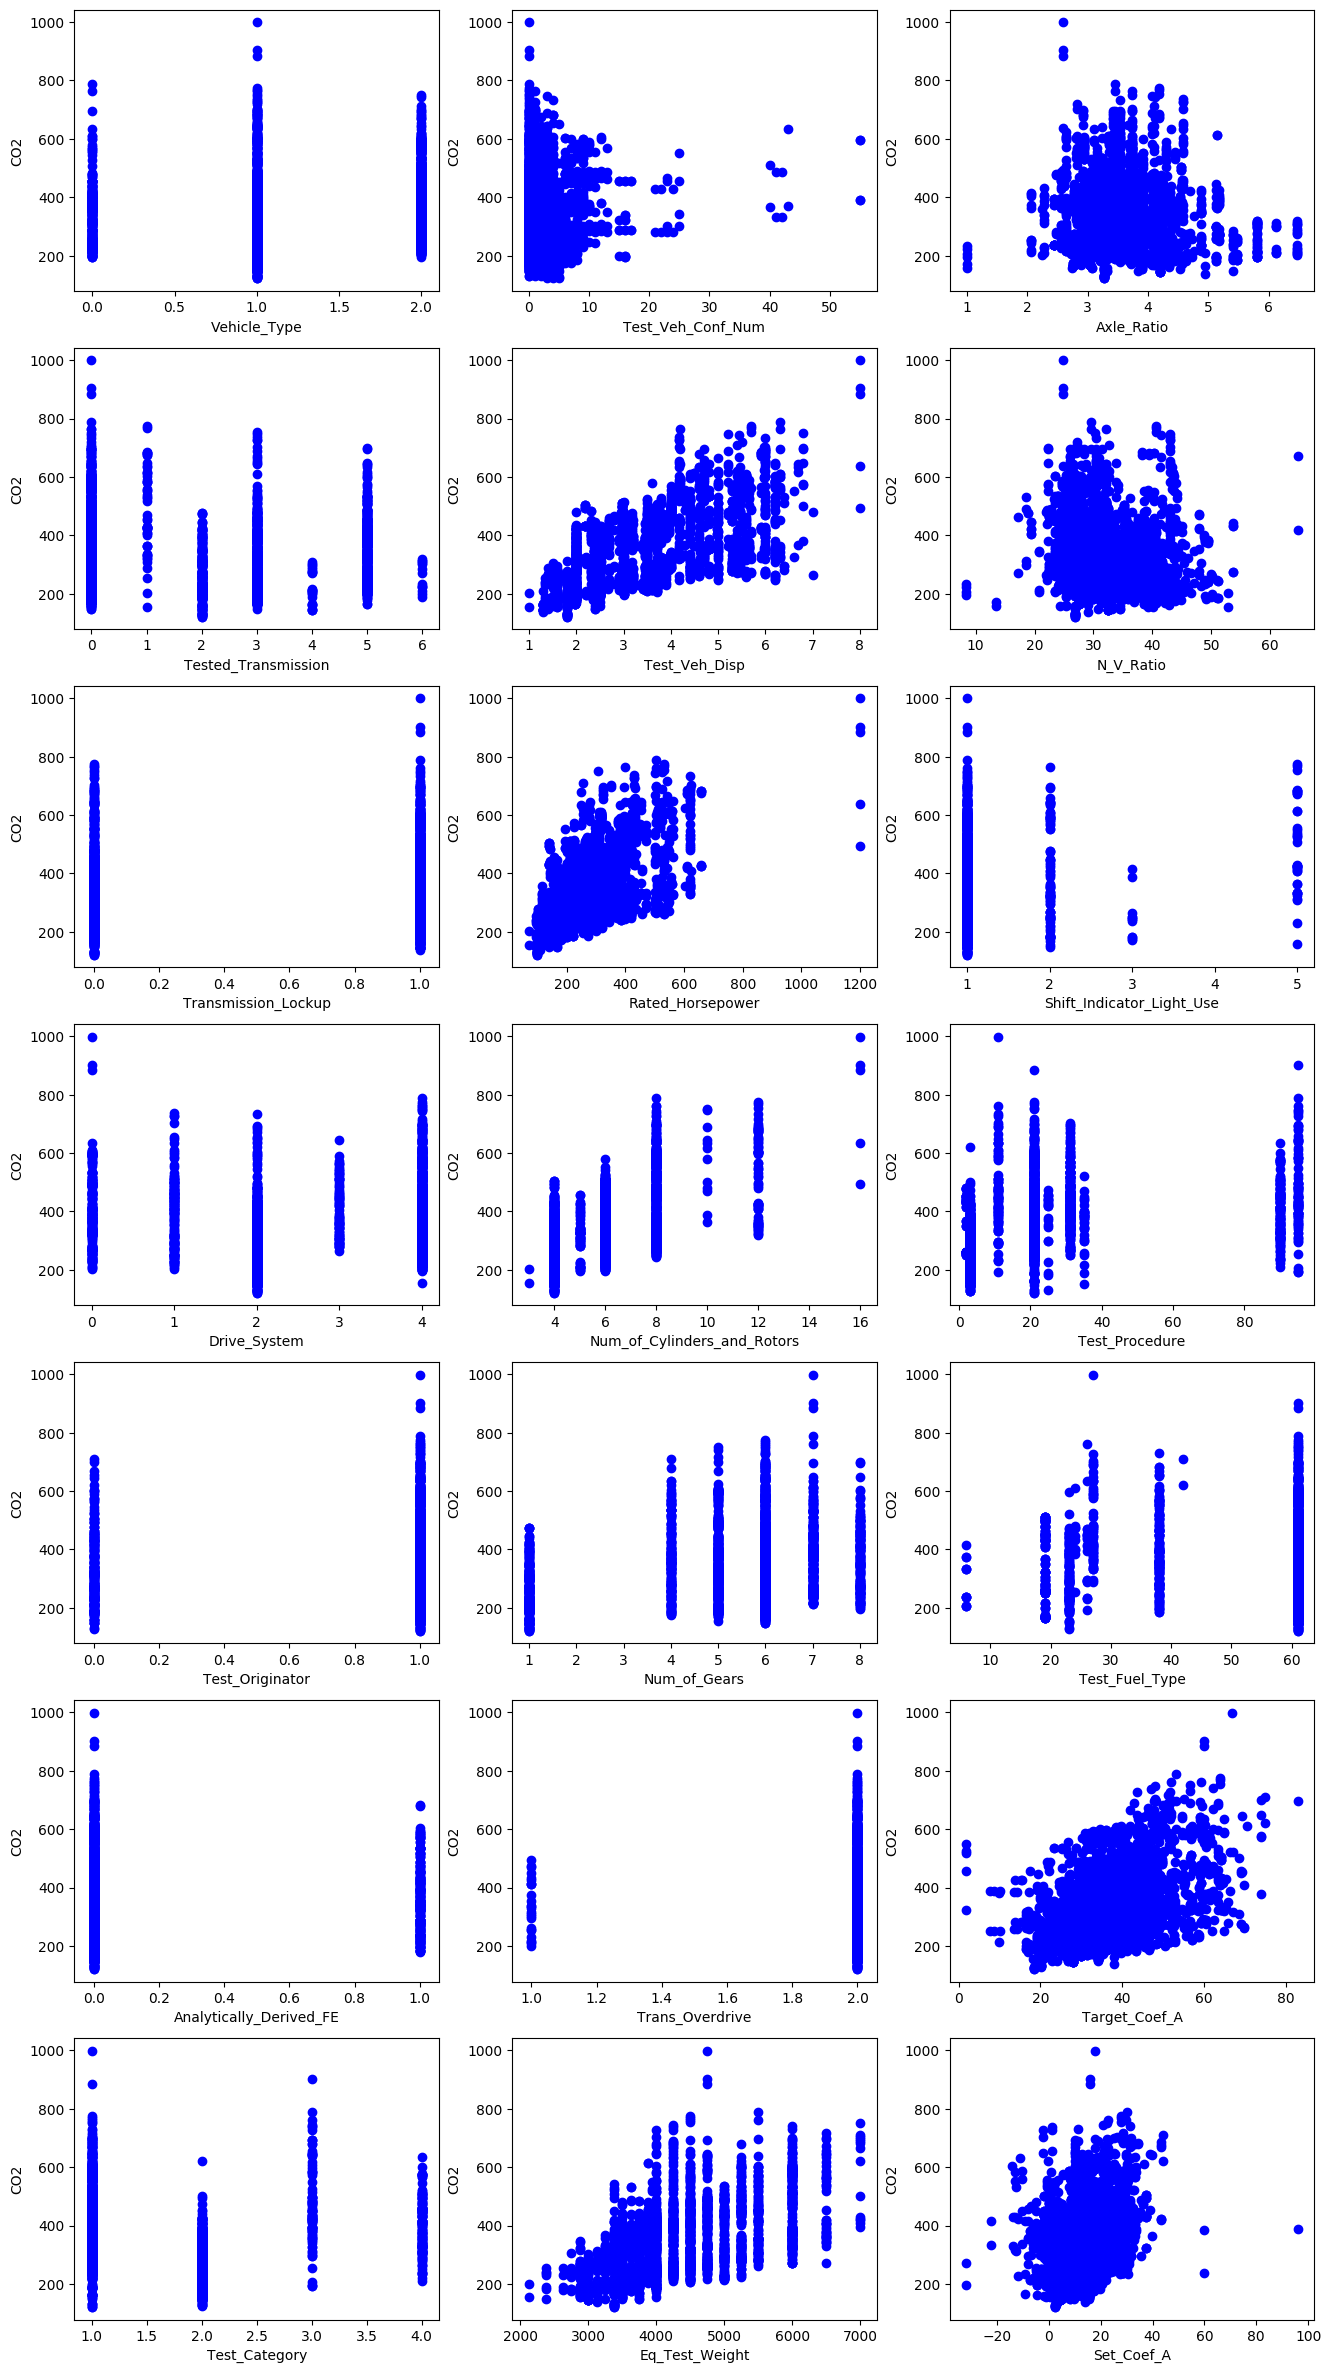

In [13]:
fig, axs = plt.subplots(7, 3, figsize=(16,30))

col=cdf.columns

for i in range(3):
    for j in range(7):
        n=j+i*7
        axs[j, i].scatter(cdf[col[n]], cdf['CO2'],  color='blue')
        axs[j, i].set_xlabel(col[n])
        axs[j, i].set_ylabel('CO2')
plt.show()

#### Find the correlation and plot heatmap

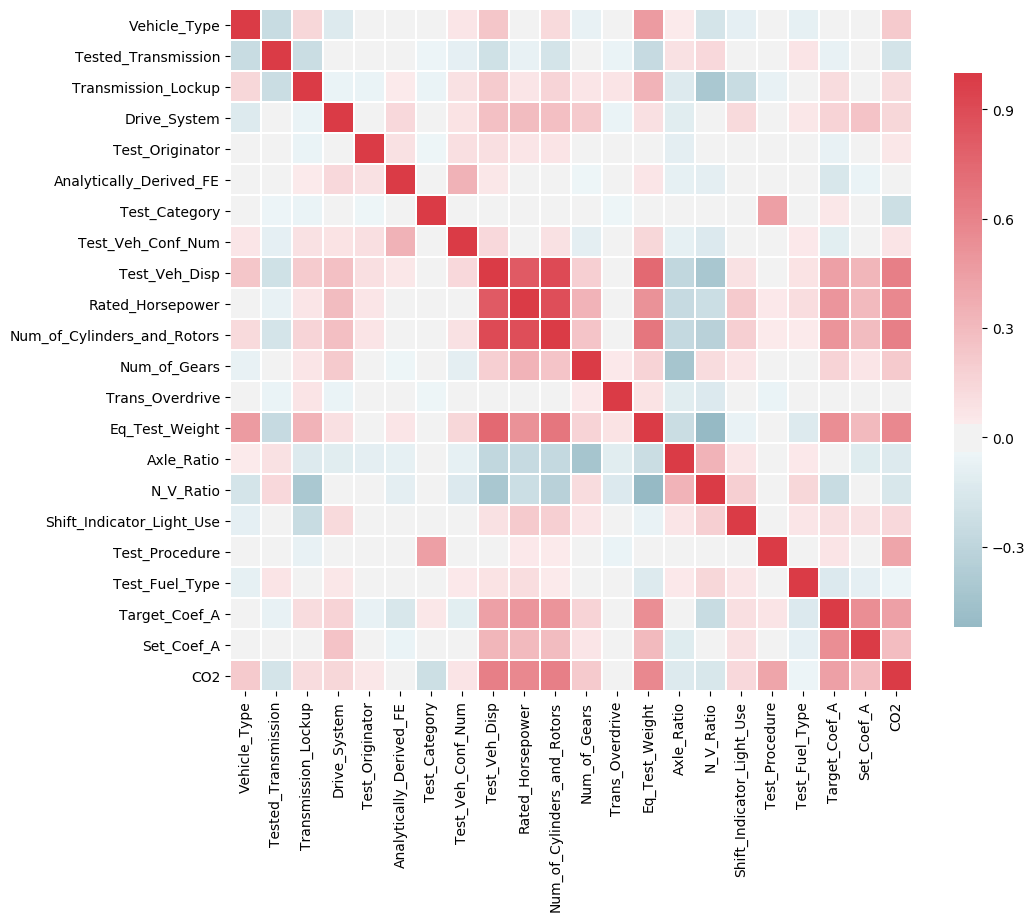

In [14]:
corr=cdf.corr()

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,  cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.show()

## Split data to tain and test datas

In [15]:
X=cdf[['Vehicle_Type','Tested_Transmission','Transmission_Lockup','Drive_System','Test_Originator','Analytically_Derived_FE','Test_Category','Test_Veh_Conf_Num','Test_Veh_Disp','Rated_Horsepower','Num_of_Cylinders_and_Rotors','Num_of_Gears','Trans_Overdrive','Eq_Test_Weight','Axle_Ratio','N_V_Ratio','Shift_Indicator_Light_Use','Test_Procedure','Test_Fuel_Type','Target_Coef_A','Set_Coef_A',]]
y=cdf[['CO2']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2424, 21) (2424, 1)
Test set: (606, 21) (606, 1)


## I build both linear and polynomic regression models to study the CO2 emission of vehicles in USA.

### Multiple Linear Regression

In [21]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)
print ('Coefficients: ', linear_reg.coef_)

y_lr = linear_reg.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_lr - y_test)))

print("Mean absolute error: %.2f" % mean_absolute_error(y_lr, y_test))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_lr, y_test))
print('Variance score: %.2f' % linear_reg.score(X_test, y_test))
print("R2-score: %.2f" % r2_score(y_lr, y_test))

Coefficients:  [[ 1.11323176e+01 -2.80275876e+00  8.83760674e+00 -3.44392210e+00
   3.05332400e+00  9.86088690e+00 -8.12383086e+01  7.99136138e-01
   2.59527565e+01  1.61815219e-01  2.31796682e+00  4.65183657e+00
   4.95313117e+00  2.69173489e-02  8.14369636e+00  3.04816054e+00
   1.26815532e+01  3.14406566e+00 -4.81438720e-01  9.34002676e-01
   7.38718421e-01]]
Mean absolute error: 34.05
Mean absolute error: 34.05
Residual sum of squares (MSE): 1992.91
Variance score: 0.86
R2-score: 0.84


### Polynomial Regression

In [18]:
poly2_reg = PolynomialFeatures(degree=2)
poly2_X_train = poly2_reg.fit_transform(X_train)

linear_reg = linear_model.LinearRegression()
linear_reg.fit(poly2_X_train, y_train)
# The coefficients
# print ('Coefficients: ', linear_reg.coef_)
# print ('Intercept: ',linear_reg.intercept_)

poly2_X_test = poly2_reg.fit_transform(X_test)
yhat_poly2 = linear_reg.predict(poly2_X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat_poly2 - y_test)))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(yhat_poly2, y_test))
print('Variance score: %.2f' % linear_reg.score(poly2_X_test,y_test))
print("R2-score: %.2f" % r2_score(yhat_poly2, y_test))

Mean absolute error: 20.15
Residual sum of squares (MSE): 714.43
Variance score: 0.95
R2-score: 0.95


** I find the polynomial model with degree=2 has better accuracy than the linear regression. **